Tugas Akhir : 

### Analisis Sentimen Mitra untuk Telkom University Pada Media Sosial Twitter Menggunakan Algoritma Decision Tree (CART)

Sean Akbar Ryanto (1301180258)

# Library Package

## Install Library

In [1]:
# Library package untuk preprocessing stopwords removal dan stemming
!pip install PySastrawi
!pip install -U nltk
!pip install googletrans==3.1.0a0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 210 kB 15.0 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 3.1 MB/s 
     |████████████████████████████████| 1.3 MB 31.4 MB/s 
     |████████████████████████████████| 42 kB 1.5 MB/s 
     |████████████████████████████████| 65 kB 4.0 MB/s 
     |████████████████████████████████| 53 kB 1.7 MB/s 
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16367 sha256=6a6a2fd0559ce8da0a97a3cc7aa10d9d1d831b2961e882da69c90abade8721d5
  Stored in directory: /root/.cache/pip/wheels/0c/be/fe/93a6a40ffe386e16089e44dad9018ebab9dc4cb9eb7eab65ae
Successfully built googletrans


## Import Library

In [2]:
import pandas as pd
import numpy as np
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
import re
nltk.download('punkt')
nltk.download('stopwords')

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

import matplotlib.pyplot as plt
import seaborn as sns 

from wordcloud import WordCloud, ImageColorGenerator

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Data Sentimen

## Read Data

In [3]:
data = pd.read_csv('Dataset Internal Labelled.csv')
data

,Username,Text Tweet,Sentiment
0,telucareer,bersama kak Tasha Maric Tan. Pada sharing kal...,1
1,telucareer,"bekerja diperusahaan tersebut, yaitu kak Okta ...",0
2,telucareer,CTI Group adalah Perusahaan IT yang mendistrib...,0
3,telucareer,[Alumni Sharing Chapter Industry &amp; Campus ...,1
4,telucareer,"CAE di tahun 2021, kamu tetap diperbolehkan me...",1
...,...,...,...
1847,infounivtelkom,Telkom University Badminton Club dengan Bangga...,0
1848,infounivtelkom,🛸[MAIN EVENT IFEST 2019]🛸 . Akhirnya yang ditu...,0
1849,infounivtelkom,"#InfoEvent [MAIN EVENT COMPFEST] Halo, Ignit...",0
1850,infounivtelkom,#InfoEvent [MANIFESTASI 2019 : R E T R O S P ...,0


In [4]:
data['Sentiment'].replace(to_replace = -1, value = 'negatif', inplace=True)
data['Sentiment'].replace(to_replace = 0, value = 'netral', inplace=True)
data['Sentiment'].replace(to_replace = 1, value = 'positif', inplace=True)

data

,Username,Text Tweet,Sentiment
0,telucareer,bersama kak Tasha Maric Tan. Pada sharing kal...,positif
1,telucareer,"bekerja diperusahaan tersebut, yaitu kak Okta ...",netral
2,telucareer,CTI Group adalah Perusahaan IT yang mendistrib...,netral
3,telucareer,[Alumni Sharing Chapter Industry &amp; Campus ...,positif
4,telucareer,"CAE di tahun 2021, kamu tetap diperbolehkan me...",positif
...,...,...,...
1847,infounivtelkom,Telkom University Badminton Club dengan Bangga...,netral
1848,infounivtelkom,🛸[MAIN EVENT IFEST 2019]🛸 . Akhirnya yang ditu...,netral
1849,infounivtelkom,"#InfoEvent [MAIN EVENT COMPFEST] Halo, Ignit...",netral
1850,infounivtelkom,#InfoEvent [MANIFESTASI 2019 : R E T R O S P ...,netral


Text(0.5, 0, 'Sentimen')

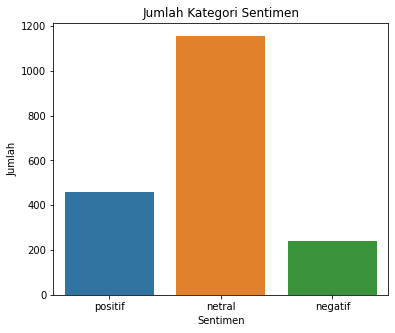

In [5]:
# Menampilkan jumlah kategori sentimen yang dimiliki pada data
f , ax = plt.subplots(figsize = (6,5))
sns.countplot(x='Sentiment', data=data)
plt.title('Jumlah Kategori Sentimen', y=1, size=12)
plt.ylabel('Jumlah')
plt.xlabel('Sentimen')

In [6]:
data['Sentiment'].value_counts()

netral     1156
positif     457
negatif     239
Name: Sentiment, dtype: int64

In [7]:
# Menyalin data yang dimiliki kedalam variabel lain
sentimen1 = data.copy()

## Translate Data

In [8]:
# from googletrans import Translator

# translator = Translator()

In [9]:
# sentimen1['Text Tweet'] = sentimen1['Text Tweet'].apply(translator.translate, src='en', dest='id')

In [10]:
# sentimen1['Text Tweet'] = sentimen1['Text Tweet'].apply(getattr, args=('text',))

# sentimen1

# Pre-Processing

## Data Cleaning

In [11]:
# Fungsi untuk menghapus kata atau karakter unik
def remove_special(x):
    # remove tab, new line, ans back slice
    x = x.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # remove non ASCII (emoticon, chinese word, .etc)
    x = x.encode('ascii', 'replace').decode('ascii')
    # remove mention, link, hashtag
    # x = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)", " ",x).split())
    # remove number
    x = re.sub(r"\d+", "", x)
    # remove punctuation
    x = "".join([i for i in x if i not in string.punctuation])
    # remove single char
    # x = re.sub(r"\b[a-zA-Z]\b", "", x)
    # remove incomplete URL
    # x = x.replace("http://", " ").replace("https://", " ")
    # remove whitespace
    x = x.strip()
    return x

# Menghapus kata/karakter unik pada data yang dimiliki
sentimen1['Text Tweet'] = sentimen1['Text Tweet'].apply(lambda x:remove_special(x))

sentimen1

,Username,Text Tweet,Sentiment
0,telucareer,bersama kak Tasha Maric Tan Pada sharing kali...,positif
1,telucareer,bekerja diperusahaan tersebut yaitu kak Okta P...,netral
2,telucareer,CTI Group adalah Perusahaan IT yang mendistrib...,netral
3,telucareer,Alumni Sharing Chapter Industry amp Campus Hir...,positif
4,telucareer,CAE di tahun kamu tetap diperbolehkan mendaft...,positif
...,...,...,...
1847,infounivtelkom,Telkom University Badminton Club dengan Bangga...,netral
1848,infounivtelkom,MAIN EVENT IFEST Akhirnya yang ditunggutungg...,netral
1849,infounivtelkom,InfoEvent MAIN EVENT COMPFEST Halo Igniters ...,netral
1850,infounivtelkom,InfoEvent MANIFESTASI R E T R O S P E C T I...,netral


## Case Folding

In [12]:
# Mengubah seluruh teks menjadi huruf kecil
sentimen1['Text Tweet'] = sentimen1['Text Tweet'].str.lower()

sentimen1

,Username,Text Tweet,Sentiment
0,telucareer,bersama kak tasha maric tan pada sharing kali...,positif
1,telucareer,bekerja diperusahaan tersebut yaitu kak okta p...,netral
2,telucareer,cti group adalah perusahaan it yang mendistrib...,netral
3,telucareer,alumni sharing chapter industry amp campus hir...,positif
4,telucareer,cae di tahun kamu tetap diperbolehkan mendaft...,positif
...,...,...,...
1847,infounivtelkom,telkom university badminton club dengan bangga...,netral
1848,infounivtelkom,main event ifest akhirnya yang ditunggutungg...,netral
1849,infounivtelkom,infoevent main event compfest halo igniters ...,netral
1850,infounivtelkom,infoevent manifestasi r e t r o s p e c t i...,netral


## Remove Emoji

In [13]:
# def deEmojify(text):
#     regrex_pattern = re.compile(pattern = "["
#         u"\U0001F600-\U0001F64F"  # emoticons
#         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
#         u"\U0001F680-\U0001F6FF"  # transport & map symbols
#         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
#                            "]+", flags = re.UNICODE)
#     return regrex_pattern.sub(r'',text)

# sentimen1['Text Tweet'] = sentimen1['Text Tweet'].apply(deEmojify)

# sentimen1

## Tokenization

In [14]:
# Fungsi untuk memecah kalimat pada dataframe menjadi per kata tiap barisnya
def word_tokenized(x):
  return word_tokenize(x)

# Menginisialisasikan fungsi tokenisasi yang telah dibuat ke data
sentimen1['Text Tweet']= sentimen1['Text Tweet'].apply(word_tokenized)

sentimen1

,Username,Text Tweet,Sentiment
0,telucareer,"[bersama, kak, tasha, maric, tan, pada, sharin...",positif
1,telucareer,"[bekerja, diperusahaan, tersebut, yaitu, kak, ...",netral
2,telucareer,"[cti, group, adalah, perusahaan, it, yang, men...",netral
3,telucareer,"[alumni, sharing, chapter, industry, amp, camp...",positif
4,telucareer,"[cae, di, tahun, kamu, tetap, diperbolehkan, m...",positif
...,...,...,...
1847,infounivtelkom,"[telkom, university, badminton, club, dengan, ...",netral
1848,infounivtelkom,"[main, event, ifest, akhirnya, yang, ditunggut...",netral
1849,infounivtelkom,"[infoevent, main, event, compfest, halo, ignit...",netral
1850,infounivtelkom,"[infoevent, manifestasi, r, e, t, r, o, s, p, ...",netral


## Normalisasi

In [15]:
# Download data KBBI untuk normalisasi
!wget 'https://drive.google.com/uc?export=download&id=1pdvzHGWmnRci3FSWnzF30xMLhG1R8GnG' -O kbba.txt
!wget 'https://drive.google.com/uc?export=download&id=14M_Vi-ySjezLMXgFGThjWxerSixowes_' -O kbba_extend.txt

--2022-06-30 09:42:23--  https://drive.google.com/uc?export=download&id=1pdvzHGWmnRci3FSWnzF30xMLhG1R8GnG
Resolving drive.google.com (drive.google.com)... 142.250.145.113, 142.250.145.101, 142.250.145.102, ...
Connecting to drive.google.com (drive.google.com)|142.250.145.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-14-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/0iiqv2u8k916nrf9nrgelc993a6961rl/1656582075000/00150260977202157621/*/1pdvzHGWmnRci3FSWnzF30xMLhG1R8GnG?e=download&uuid=1f0ce1a5-c65a-4eb5-968e-23a5900d5243 [following]
--2022-06-30 09:42:24--  https://doc-0s-14-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/0iiqv2u8k916nrf9nrgelc993a6961rl/1656582075000/00150260977202157621/*/1pdvzHGWmnRci3FSWnzF30xMLhG1R8GnG?e=download&uuid=1f0ce1a5-c65a-4eb5-968e-23a5900d5243
Resolving doc-0s-14-docs.googleusercontent.com (doc-0s-14-docs.googleusercontent.com)... 142.251.31.132, 2

In [16]:
normalized_word = pd.read_csv("new_kamusalay.csv", encoding='latin-1')

normalized_word_dict = {}

for index, row in normalized_word.iterrows():
    if row[0] not in normalized_word_dict:
        normalized_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalized_word_dict[term] if term in normalized_word_dict else term for term in document]

sentimen1['Text Tweet'] = sentimen1['Text Tweet'].apply(normalized_term)

sentimen1

,Username,Text Tweet,Sentiment
0,telucareer,"[bersama, kak, tasha, maric, tan, pada, sharin...",positif
1,telucareer,"[bekerja, diperusahaan, tersebut, yaitu, kak, ...",netral
2,telucareer,"[cti, grup, adalah, perusahaan, it, yang, mend...",netral
3,telucareer,"[alumni, sharing, chapter, industri, amp, kamp...",positif
4,telucareer,"[cae, di, tahun, kamu, tetap, diperbolehkan, m...",positif
...,...,...,...
1847,infounivtelkom,"[telkom, universitas, badminton, club, dengan,...",netral
1848,infounivtelkom,"[main, acara, ifest, akhirnya, yang, ditunggut...",netral
1849,infounivtelkom,"[infoevent, main, acara, compfest, halo, ignit...",netral
1850,infounivtelkom,"[infoevent, manifestasi, r, e, t, r, o, si, p,...",netral


## Untokenization

In [17]:
#Menggabungkan kembali kata kata yang telah dipecah menjadi 1 kalimat
def untokenize(words):
    text = ' '.join(words)
    step1 = text.replace("`` ", '"').replace(" ''", '"').replace('. . .',  '...')
    step2 = step1.replace(" ( ", " (").replace(" ) ", ") ")
    step3 = re.sub(r' ([.,:;?!%]+)([ \'"`])', r"\1\2", step2)
    step4 = re.sub(r' ([.,:;?!%]+)$', r"\1", step3)
    step5 = step4.replace(" '", "'").replace(" n't", "n't").replace(
         "can not", "cannot")
    step6 = step5.replace(" ` ", " '")
    return step6.strip()

sentimen1['Text Tweet'] = sentimen1['Text Tweet'].apply(untokenize)

sentimen1

,Username,Text Tweet,Sentiment
0,telucareer,bersama kak tasha maric tan pada sharing kali ...,positif
1,telucareer,bekerja diperusahaan tersebut yaitu kak okta p...,netral
2,telucareer,cti grup adalah perusahaan it yang mendistribu...,netral
3,telucareer,alumni sharing chapter industri amp kampus hir...,positif
4,telucareer,cae di tahun kamu tetap diperbolehkan mendafta...,positif
...,...,...,...
1847,infounivtelkom,telkom universitas badminton club dengan bangg...,netral
1848,infounivtelkom,main acara ifest akhirnya yang ditunggutunggu ...,netral
1849,infounivtelkom,infoevent main acara compfest halo igniters pa...,netral
1850,infounivtelkom,infoevent manifestasi r e t r o si p e c t i v...,netral


# Data Splitting

In [18]:
# Memecah/memisahkan dataset kedalam bentuk data train dan data validasi dengan perbandingan 80:20
x1 = sentimen1['Text Tweet']
y1 = sentimen1['Sentiment']

from sklearn.model_selection import train_test_split

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.20 , shuffle=True, random_state=123)

In [19]:
# Memecah/memisahkan dataset kedalam bentuk data train dan data validasi dengan perbandingan 75:25
x2 = sentimen1['Text Tweet']
y2 = sentimen1['Sentiment']

from sklearn.model_selection import train_test_split

x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.25 , shuffle=True, random_state=123)

In [20]:
# Memecah/memisahkan dataset kedalam bentuk data train dan data validasi dengan perbandingan 70:30
x3 = sentimen1['Text Tweet']
y3 = sentimen1['Sentiment']

from sklearn.model_selection import train_test_split

x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.30 , shuffle=True, random_state=123)

# Feature Extraction TF-IDF (80:20)

## Proses Pembobotan TF-IDF

In [21]:
# Melakukan pembobotan terhadap data x_train dan y_train yang telah dilakukan splitting
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1,1))
vector = vectorizer.fit(sentimen1['Text Tweet'])
x1_train_tfidf = vector.transform(x1_train)
x1_test_tfidf = vector.transform(x1_test)

## Hasil Pembobotan TF-IDF

In [22]:
# Tabel Hasil Pembobotan x_train
weights = np.asarray(x1_train_tfidf.mean(axis=0)).ravel().tolist()
weights_x1_train_tfidf = pd.DataFrame({"term": vector.get_feature_names(),"weight": weights})
weights_x1_train_tfidf.sort_values(by= "weight", ascending = False)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,term,weight
4133,lowongan,0.039190
6517,telkomuniversity,0.035763
7062,yang,0.032540
1079,dan,0.031964
1173,di,0.030135
...,...,...
2962,httpstcowidibakjjd,0.000000
2966,httpstcowmsqxbzmyb,0.000000
2977,httpstcowuzlrfzwv,0.000000
1462,dwikardanaphd,0.000000


In [23]:
# Tabel Hasil Pembobotan x_test
weights = np.asarray(x1_test_tfidf.mean(axis=0)).ravel().tolist()
weights_x1_test_tfidf = pd.DataFrame({"term": vector.get_feature_names(),"weight": weights})
weights_x1_test_tfidf.sort_values(by= "weight", ascending = False)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,term,weight
4133,lowongan,0.037677
1079,dan,0.034203
6517,telkomuniversity,0.031930
7062,yang,0.030365
6522,telucae,0.029841
...,...,...
3880,krtiteria,0.000000
3879,kriya,0.000000
3878,kriteria,0.000000
3877,krim,0.000000


# Feature Extraction TF-IDF (75:25)

## Proses Pembobotan TF-IDF

In [24]:
# Melakukan pembobotan terhadap data x_train dan y_train yang telah dilakukan splitting
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1,1))
vector = vectorizer.fit(sentimen1['Text Tweet'])
x2_train_tfidf = vector.transform(x2_train)
x2_test_tfidf = vector.transform(x2_test)

## Hasil Pembobotan TF-IDF

In [25]:
# Tabel Hasil Pembobotan x_train
weights = np.asarray(x2_train_tfidf.mean(axis=0)).ravel().tolist()
weights_x2_train_tfidf = pd.DataFrame({"term": vector.get_feature_names(),"weight": weights})
weights_x2_train_tfidf.sort_values(by= "weight", ascending = False)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,term,weight
4133,lowongan,0.038654
6517,telkomuniversity,0.035496
7062,yang,0.032609
1079,dan,0.032024
1173,di,0.030274
...,...,...
2448,httpstcojumdoowges,0.000000
5777,royal,0.000000
5775,roti,0.000000
2468,httpstcokhtddpet,0.000000


In [26]:
# Tabel Hasil Pembobotan x_test
weights = np.asarray(x2_test_tfidf.mean(axis=0)).ravel().tolist()
weights_x2_test_tfidf = pd.DataFrame({"term": vector.get_feature_names(),"weight": weights})
weights_x2_test_tfidf.sort_values(by= "weight", ascending = False)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,term,weight
4133,lowongan,0.039585
1079,dan,0.033576
6517,telkomuniversity,0.033490
7062,yang,0.030589
6522,telucae,0.029206
...,...,...
4116,lombagratis,0.000000
1874,governments,0.000000
1873,government,0.000000
4119,lombamahasiswa,0.000000


# Feature Extraction TF-IDF (70:30)

## Proses Pembobotan TF-IDF

In [27]:
# Melakukan pembobotan terhadap data x_train dan y_train yang telah dilakukan splitting
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1,1))
vector = vectorizer.fit(sentimen1['Text Tweet'])
x3_train_tfidf = vector.transform(x3_train)
x3_test_tfidf = vector.transform(x3_test)

## Hasil Pembobotan TF-IDF

In [28]:
# Tabel Hasil Pembobotan x_train
weights = np.asarray(x3_train_tfidf.mean(axis=0)).ravel().tolist()
weights_x3_train_tfidf = pd.DataFrame({"term": vector.get_feature_names(),"weight": weights})
weights_x3_train_tfidf.sort_values(by= "weight", ascending = False)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,term,weight
4133,lowongan,0.038843
6517,telkomuniversity,0.035053
7062,yang,0.032392
1079,dan,0.031846
1173,di,0.029513
...,...,...
3002,httpstcoxdsidxbu,0.000000
5254,perum,0.000000
6114,sikeren,0.000000
3000,httpstcoxcgqzqus,0.000000


In [29]:
# Tabel Hasil Pembobotan x_test
weights = np.asarray(x3_test_tfidf.mean(axis=0)).ravel().tolist()
weights_x3_test_tfidf = pd.DataFrame({"term": vector.get_feature_names(),"weight": weights})
weights_x3_test_tfidf.sort_values(by= "weight", ascending = False)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,term,weight
4133,lowongan,0.038990
6517,telkomuniversity,0.034858
1079,dan,0.033732
7062,yang,0.031434
1173,di,0.029519
...,...,...
4326,mediongrouo,0.000000
4327,mediyasa,0.000000
2023,hima,0.000000
4329,meets,0.000000


# Klasifikasi

In [30]:
# Library package untuk evaluasi model dengan nilai akurasi
from sklearn.metrics import accuracy_score

# Library package untuk evaluasi keseluruhan performa model
from sklearn.metrics import classification_report

## Hyperparameter Tuning GridSearchCV (80:20)

In [31]:
from sklearn.tree import DecisionTreeClassifier     # Library package untuk klasifikasi algoritma Decision Tree
from sklearn.model_selection import GridSearchCV    # Library package untuk menggunakan validasi GridSearchCV

# Mencari parameter max_depth terbaik antara 1 sampai 30 untuk Decision Tree (CART)
param_grid = {'max_depth' : np.arange(1, 30),
              'splitter' : ['best', 'random']}

# Melatih model untuk mencari parameter max_dept terbaik untuk Decision Tree (CART) berdasarkan nilai akurasi
dt_clf1 = GridSearchCV(DecisionTreeClassifier(criterion='gini'), param_grid, cv=10, scoring='accuracy')
dt_clf1.fit(x1_train_tfidf, y1_train)

# Menampilkan parameter max_depth terbaik
print('best parameter : ', dt_clf1.best_params_)

best parameter :  {'max_depth': 10, 'splitter': 'best'}


In [32]:
# Menampilkan akurasi terbaik
print('accuracy : ', dt_clf1.best_score_)

accuracy :  0.7116633411935426


### Decision Tree 80:20

In [43]:
# Melatih model klasifikasi dengan algoritma Decision Tree (CART)
dt_clf1 = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=10)
dt_clf1.fit(x1_train_tfidf, y1_train)

# Memprediksi label sentimen dengan data validasi
dt_predict1 = dt_clf1.predict(x1_test_tfidf)

# Menampilkan akurasi dari algoritma Decision Tree (CART) yang didapatkan
print("Decision Tree Accuracy Score:", round(accuracy_score(dt_predict1, y1_test) * 100, 4), '%')

# Menampilkan hasil evaluasi performa secara keseluruhan
print("Classification Report:")
print(classification_report(dt_predict1, y1_test, digits=4))

Decision Tree Accuracy Score: 65.4987 %
Classification Report:
              precision    recall  f1-score   support

     negatif     0.5714    0.9032    0.7000        31
      netral     0.9035    0.6603    0.7630       312
     positif     0.0957    0.3214    0.1475        28

    accuracy                         0.6550       371
   macro avg     0.5236    0.6283    0.5368       371
weighted avg     0.8148    0.6550    0.7113       371



## Confusion Matrix 80:20

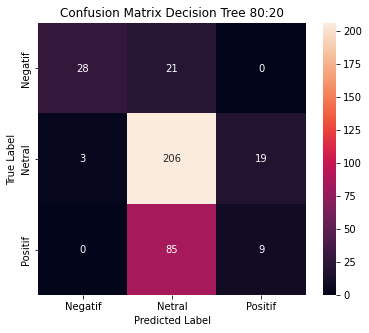

In [44]:
from sklearn.metrics import confusion_matrix

f , ax = plt.subplots(figsize = (6,5))
conf_mat = confusion_matrix(y1_test, dt_predict1)
class_label = ["Negatif", "Netral", "Positif"]
cm = pd.DataFrame(conf_mat, index=class_label, columns=class_label)
sns.heatmap(cm, annot = True,  fmt=".0f", ax=ax)
plt.title("Confusion Matrix Decision Tree 80:20", y=1, size=12)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Hyperparameter Tuning GridSearchCV (75:25)

In [45]:
from sklearn.tree import DecisionTreeClassifier     # Library package untuk klasifikasi algoritma Decision Tree
from sklearn.model_selection import GridSearchCV

# Mencari parameter max_depth terbaik antara 1 sampai 30 untuk Decision Tree (CART)
param_grid = {'max_depth' : np.arange(1, 30),
              'splitter' : ['best', 'random']}

# Melatih model untuk mencari parameter max_dept terbaik untuk Decision Tree (CART) berdasarkan nilai akurasi
dt_clf2 = GridSearchCV(DecisionTreeClassifier(criterion='gini'), param_grid, cv=10, scoring='accuracy')
dt_clf2.fit(x2_train_tfidf, y2_train)

# Menampilkan parameter max_depth terbaik
print('best parameter : ', dt_clf2.best_params_)

best parameter :  {'max_depth': 12, 'splitter': 'random'}


In [46]:
# Menampilkan akurasi terbaik
print('accuracy : ', dt_clf2.best_score_)

accuracy :  0.6990720467104576


### Decision Tree 75:25

In [47]:
# Melatih model klasifikasi dengan algoritma Decision Tree (CART)
dt_clf2 = DecisionTreeClassifier(criterion='gini', splitter='random', max_depth=12)
dt_clf2.fit(x2_train_tfidf, y2_train)

# Memprediksi label sentimen dengan data validasi
dt_predict2 = dt_clf2.predict(x2_test_tfidf)

# Menampilkan akurasi dari algoritma Decision Tree (CART) yang didapatkan
print("Decision Tree Accuracy Score:", round(accuracy_score(dt_predict2, y2_test) * 100, 4), '%')

# Menampilkan hasil evaluasi performa secara keseluruhan
print("Classification Report:")
print(classification_report(dt_predict2, y2_test, digits=4))

Decision Tree Accuracy Score: 66.7387 %
Classification Report:
              precision    recall  f1-score   support

     negatif     0.6441    0.8636    0.7379        44
      netral     0.9301    0.6667    0.7766       399
     positif     0.0424    0.2500    0.0725        20

    accuracy                         0.6674       463
   macro avg     0.5388    0.5934    0.5290       463
weighted avg     0.8645    0.6674    0.7425       463



## Confusion Matrix Decision Tree 75:25

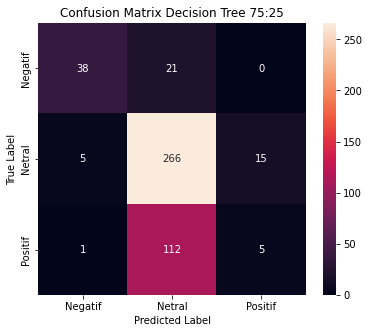

In [48]:
from sklearn.metrics import confusion_matrix

f , ax = plt.subplots(figsize = (6,5))
conf_mat = confusion_matrix(y2_test, dt_predict2)
class_label = ["Negatif", "Netral", "Positif"]
cm = pd.DataFrame(conf_mat, index=class_label, columns=class_label)
sns.heatmap(cm, annot = True,  fmt=".0f", ax=ax)
plt.title("Confusion Matrix Decision Tree 75:25", y=1, size=12)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Hyperparameter Tuning GridSearchCV (70:30)

In [53]:
from sklearn.tree import DecisionTreeClassifier     # Library package untuk klasifikasi algoritma Decision Tree
from sklearn.model_selection import GridSearchCV

# Mencari parameter max_depth terbaik antara 1 sampai 30 untuk Decision Tree (CART)
param_grid = {'max_depth' : np.arange(1, 30),
              'splitter' : ['best', 'random']}

# Melatih model untuk mencari parameter max_dept terbaik untuk Decision Tree (CART) berdasarkan nilai akurasi
dt_clf3 = GridSearchCV(DecisionTreeClassifier(criterion='gini'), param_grid, cv=10, scoring='accuracy')
dt_clf3.fit(x3_train_tfidf, y3_train)

# Menampilkan parameter max_depth terbaik
print('best parameter : ', dt_clf3.best_params_)

best parameter :  {'max_depth': 5, 'splitter': 'random'}


In [55]:
# Menampilkan akurasi terbaik
print('accuracy : ', dt_clf3.best_score_)

accuracy :  0.7052295766249255


### Decision Tree 70:30

In [56]:
# Melatih model klasifikasi dengan algoritma Decision Tree (CART)
dt_clf3 = DecisionTreeClassifier(criterion='gini', splitter='random', max_depth=5)
dt_clf3.fit(x3_train_tfidf, y3_train)

# Memprediksi label sentimen dengan data validasi
dt_predict3 = dt_clf3.predict(x3_test_tfidf)

# Menampilkan akurasi dari algoritma Decision Tree (CART) yang didapatkan
print("Decision Tree Accuracy Score:", round(accuracy_score(dt_predict3, y3_test) * 100, 4), '%')

# Menampilkan hasil evaluasi performa secara keseluruhan
print("Classification Report:")
print(classification_report(dt_predict3, y3_test, digits=4))

Decision Tree Accuracy Score: 67.9856 %
Classification Report:
              precision    recall  f1-score   support

     negatif     0.6447    0.8448    0.7313        58
      netral     0.9438    0.6674    0.7819       478
     positif     0.0704    0.5000    0.1235        20

    accuracy                         0.6799       556
   macro avg     0.5530    0.6707    0.5456       556
weighted avg     0.8812    0.6799    0.7529       556



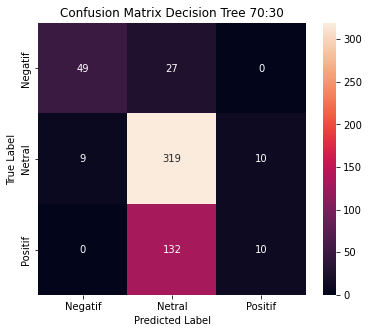

In [57]:
from sklearn.metrics import confusion_matrix

f , ax = plt.subplots(figsize = (6,5))
conf_mat = confusion_matrix(y3_test, dt_predict3)
class_label = ["Negatif", "Netral", "Positif"]
cm = pd.DataFrame(conf_mat, index=class_label, columns=class_label)
sns.heatmap(cm, annot = True,  fmt=".0f", ax=ax)
plt.title("Confusion Matrix Decision Tree 70:30", y=1, size=12)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()